### 1. Elegimos el Caso de prevención de Infartos

In [1]:
#Librerías para manipulación de datos
import numpy as np
import pandas as pd
import xgboost as xgb


#Librerías para visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#Librerías para tratamiento, modelado y evaluación de datos
import catboost
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [2]:
# Carga de Datos 
infartos = pd.read_csv('2_DS_train_enf_corazon.csv',sep = ";",encoding = 'latin1') 

### 2. Descripcción general de las Variables

In [3]:
# Visualizamos la dimensionalidad
infartos.shape

(43400, 12)

In [4]:
# Visualizamos el archivo
infartos.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Promedio_nivel_glucosa,IMC,Flag_fumador,Ataque_cardiaco
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,95.12,18.0,NaN,0
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,87.96,39.2,Nunca_fuma,0
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,110.89,17.6,NaN,0
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,69.04,35.9,antes_fumaba,0
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,161.28,19.1,NaN,0


In [5]:
# Descripción de las variables 
infartos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      43400 non-null  int64  
 1   Genero                  43400 non-null  object 
 2   Edad                    43400 non-null  float64
 3   Flag_hipertension       43400 non-null  int64  
 4   Flag_problem_cardiaco   43400 non-null  int64  
 5   Estados_civil           43400 non-null  object 
 6   Tipo_trabajo            43400 non-null  object 
 7   Zona_residencia         43400 non-null  object 
 8   Promedio_nivel_glucosa  43400 non-null  float64
 9   IMC                     41938 non-null  float64
 10  Flag_fumador            30108 non-null  object 
 11  Ataque_cardiaco         43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### 3. Entendimiento de los datos
### 4. Tratamiento de datos

In [6]:
print('Valores faltantes por columna:')
print(infartos.isnull().sum())
# Análisis:
# Poodemos observar las que dos de nuestras variables contienen NaN, 
# 'Flag_fumador' y 'IMC'

Valores faltantes por columna:
ID                            0
Genero                        0
Edad                          0
Flag_hipertension             0
Flag_problem_cardiaco         0
Estados_civil                 0
Tipo_trabajo                  0
Zona_residencia               0
Promedio_nivel_glucosa        0
IMC                        1462
Flag_fumador              13292
Ataque_cardiaco               0
dtype: int64


In [7]:
infartos['Flag_fumador'].unique()
# Observamos que la variable tiene 4 tipos de valores:

array([nan, 'Nunca_fuma', 'antes_fumaba', 'fumador'], dtype=object)

In [8]:
infartos['Flag_fumador'].value_counts().sort_index

<bound method Series.sort_index of Flag_fumador
Nunca_fuma      16053
antes_fumaba     7493
fumador          6562
Name: count, dtype: int64>

In [9]:
infartos.describe()

,ID,Edad,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,IMC,Ataque_cardiaco
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [10]:
# Calculamos el coeficiente de variación de la edad 
std_edad = infartos['Edad'].std()
mean_edad = infartos['Edad'].mean()

cv_Edad = (std_edad / mean_edad) * 100
print('El coeficiente de variación de la edad en el estudio es es: ', cv_Edad)

El coeficiente de variación de la edad en el estudio es es:  53.34147808412026


<Axes: xlabel='Genero', ylabel='Edad'>

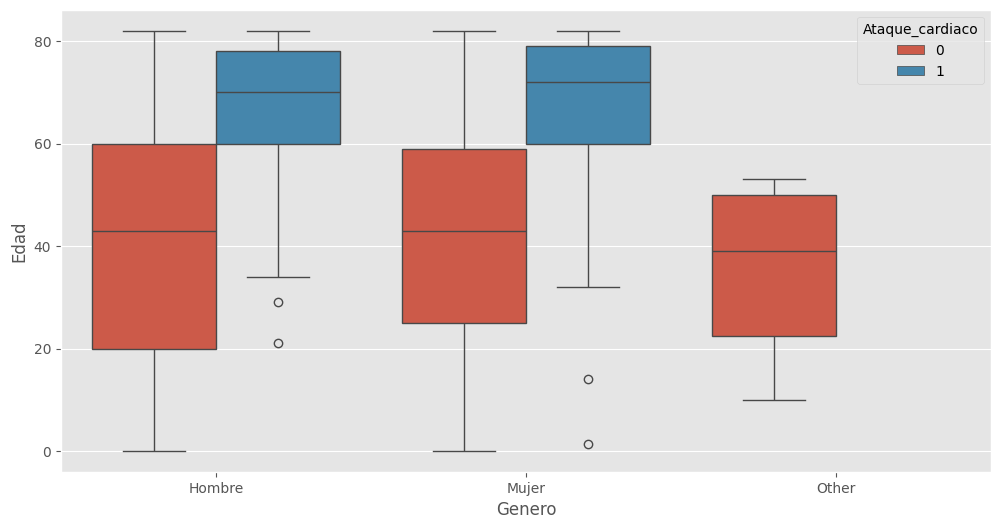

In [11]:
# Diagrama de Cajas para validar si existen outliers
plt.figure(figsize=(12,6))
sns.boxplot(x="Genero",y="Edad", hue="Ataque_cardiaco", data=infartos)

# Análisis: 
# Podemos determinar que hay más infartos en las personas de 
# mayor edad. 
# Los outliers no son significativos.

<Axes: xlabel='Edad', ylabel='count'>

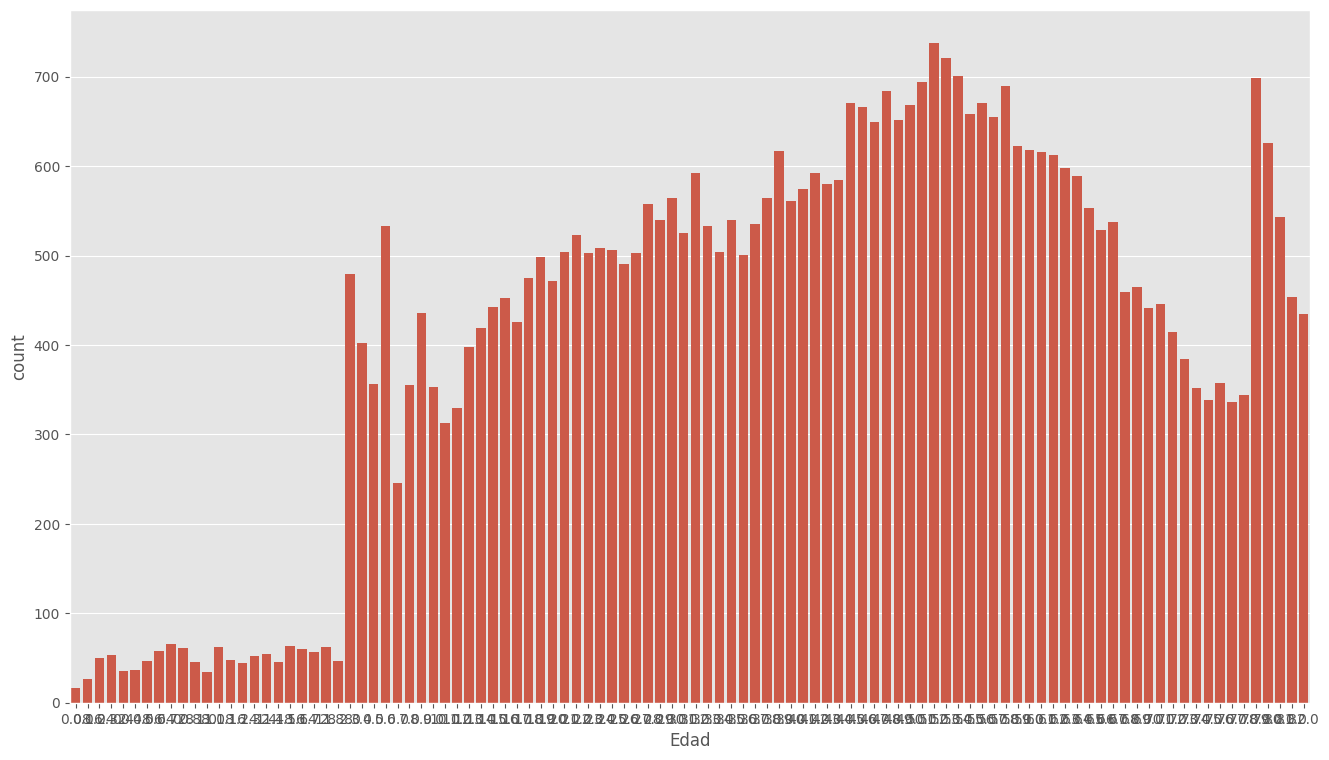

In [12]:
sns.countplot(data = infartos, x = "Edad")
# Distribución de cantidad por edad

<Axes: xlabel='Genero', ylabel='Promedio_nivel_glucosa'>

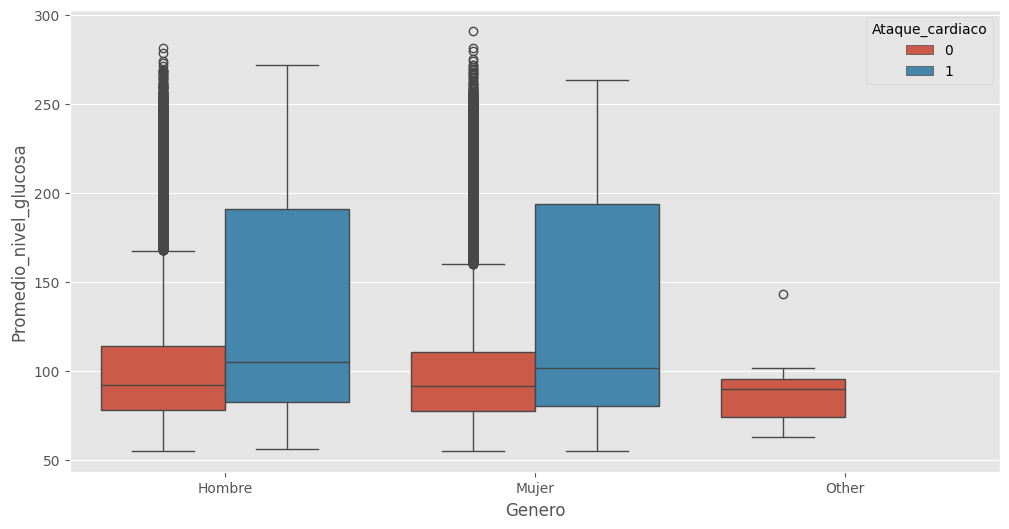

In [13]:
# Diagrama de Cajas para validar si existen outliers
plt.figure(figsize=(12,6))
sns.boxplot(x="Genero",y="Promedio_nivel_glucosa", hue="Ataque_cardiaco", data=infartos)

# Análisis: Podemos determinar que hay Outliers en esta variable

In [14]:
infartos['Promedio_nivel_glucosa'].quantile(np.arange(0,1,0.1))

0.0     55.000
0.1     66.180
0.2     74.350
0.3     80.370
0.4     85.626
0.5     91.580
0.6     98.240
0.7    106.370
0.8    120.290
0.9    180.952
Name: Promedio_nivel_glucosa, dtype: float64

In [15]:
infartos['Promedio_nivel_glucosa'].quantile(np.arange(0.8,1,0.01))

0.80    120.2900
0.81    122.7419
0.82    125.3118
0.83    128.3117
0.84    132.1916
0.85    136.8115
0.86    142.1000
0.87    149.2678
0.88    158.4112
0.89    170.0655
0.90    180.9520
0.91    189.0600
0.92    196.0824
0.93    201.5800
0.94    207.1200
0.95    212.0415
0.96    216.8800
0.97    222.6903
0.98    229.3810
0.99    239.1902
Name: Promedio_nivel_glucosa, dtype: float64

In [16]:
# Defno la función para filtrar los outliers
# clip() es el comando para recorte o limitación de valores
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.85))

    return(x)

# Aplico la función para hacer el tratamiento a la variable target
# función lambda sirve para que recorra todas las filas posibles
# Se esta reemplazando los outliers con los valores maximos del cuartil 0.95
infartos_tratamiento = infartos[['Promedio_nivel_glucosa']].apply(lambda x: outlier_capping(x))

In [17]:
# Unificar la nueva variable con el DF original
infartos = pd.concat([infartos.drop(columns=['Promedio_nivel_glucosa']), infartos_tratamiento], axis=1,)

In [18]:
infartos.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,IMC,Flag_fumador,Ataque_cardiaco,Promedio_nivel_glucosa
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,18.0,NaN,0,95.1200
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,39.2,Nunca_fuma,0,87.9600
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,17.6,NaN,0,110.8900
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,35.9,antes_fumaba,0,69.0400
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,19.1,NaN,0,136.8115


<Axes: xlabel='Genero', ylabel='Promedio_nivel_glucosa'>

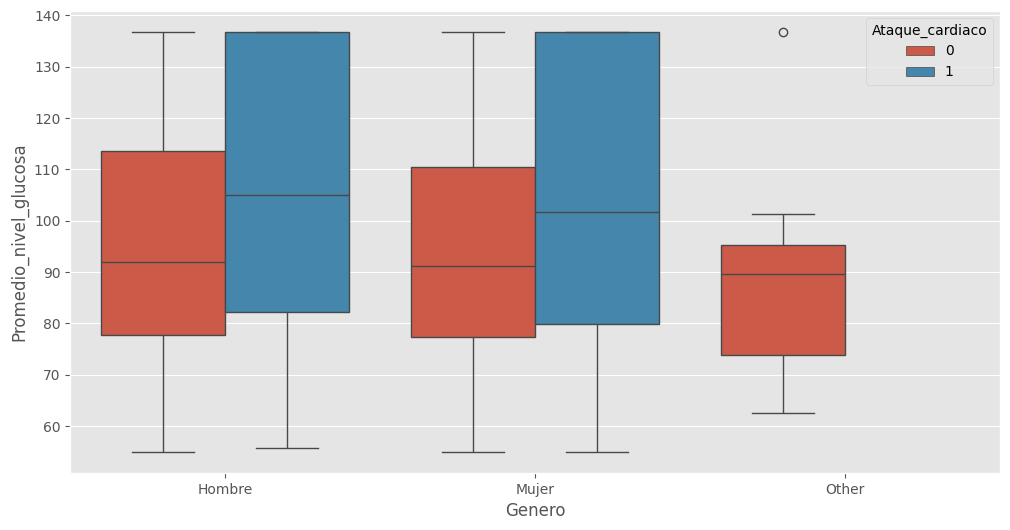

In [19]:
# Diagrama de Cajas para validar si existen outliers
plt.figure(figsize=(12,6))
sns.boxplot(x="Genero",y="Promedio_nivel_glucosa", hue="Ataque_cardiaco", data=infartos)

# Grafico con tratamiento de Outliers para "Promedio_nivel_glucosa".

<Axes: xlabel='Genero', ylabel='IMC'>

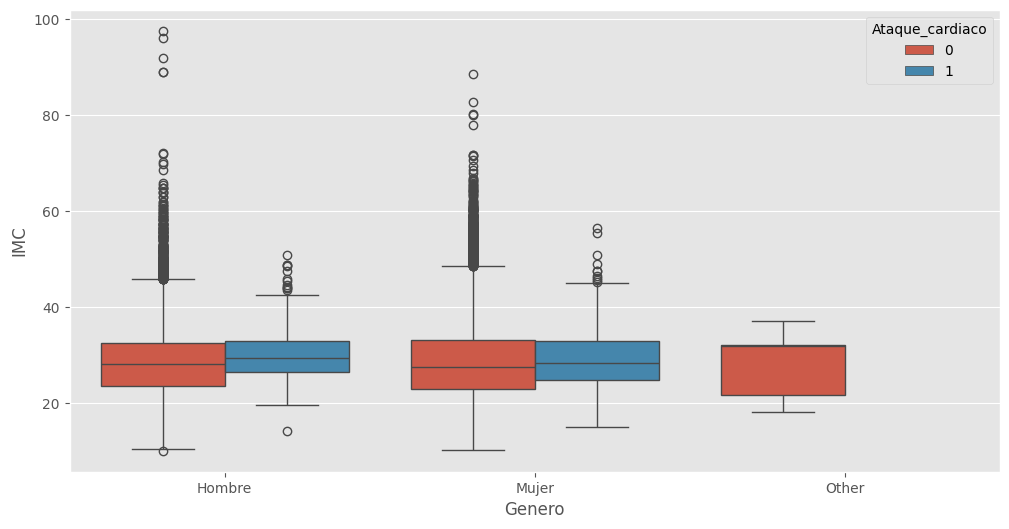

In [20]:
# Diagrama de Cajas para validar si existen outliers
plt.figure(figsize=(12,6))
sns.boxplot(x="Genero",y="IMC", hue="Ataque_cardiaco", data=infartos)

In [21]:
infartos['IMC'].quantile(np.arange(0,1,0.1))

0.0    10.1
0.1    19.4
0.2    22.2
0.3    24.2
0.4    26.0
0.5    27.7
0.6    29.6
0.7    31.6
0.8    34.3
0.9    38.6
Name: IMC, dtype: float64

In [22]:
infartos['IMC'].quantile(np.arange(0.95,1,0.001))

0.950    42.6000
0.951    42.7000
0.952    42.8000
0.953    42.9000
0.954    43.1000
0.955    43.2000
0.956    43.3000
0.957    43.4000
0.958    43.6000
0.959    43.7000
0.960    43.8000
0.961    44.0000
0.962    44.1000
0.963    44.3000
0.964    44.5000
0.965    44.6000
0.966    44.8000
0.967    45.0000
0.968    45.1016
0.969    45.3000
0.970    45.5000
0.971    45.7000
0.972    45.9000
0.973    46.1000
0.974    46.4000
0.975    46.6000
0.976    46.8000
0.977    47.0000
0.978    47.2000
0.979    47.5000
0.980    47.8000
0.981    48.1000
0.982    48.5000
0.983    48.9000
0.984    49.1000
0.985    49.5000
0.986    49.9000
0.987    50.3000
0.988    50.8000
0.989    51.2000
0.990    51.8000
0.991    52.5000
0.992    53.2000
0.993    53.9000
0.994    54.8000
0.995    55.6000
0.996    56.6000
0.997    58.2000
0.998    60.2000
0.999    64.2000
1.000    97.6000
Name: IMC, dtype: float64

In [23]:
# Defno la función para filtrar los outliers
# clip() es el comando para recorte o limitación de valores
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))

    return(x)

# Aplico la función para hacer el tratamiento a la variable target
# función lambda sirve para que recorra todas las filas posibles
# Se esta reemplazando los outliers con los valores maximos del cuartil 0.95
infartos_tratamiento = infartos[['IMC']].apply(lambda x: outlier_capping(x))

In [24]:
# Unificar la nueva variable con el DF original
infartos = pd.concat([infartos.drop(columns=['IMC']), infartos_tratamiento], axis=1,)

In [25]:
infartos.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Flag_fumador,Ataque_cardiaco,Promedio_nivel_glucosa,IMC
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,NaN,0,95.1200,18.0
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,Nunca_fuma,0,87.9600,39.2
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,NaN,0,110.8900,17.6
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,antes_fumaba,0,69.0400,35.9
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,NaN,0,136.8115,19.1


<Axes: xlabel='Genero', ylabel='IMC'>

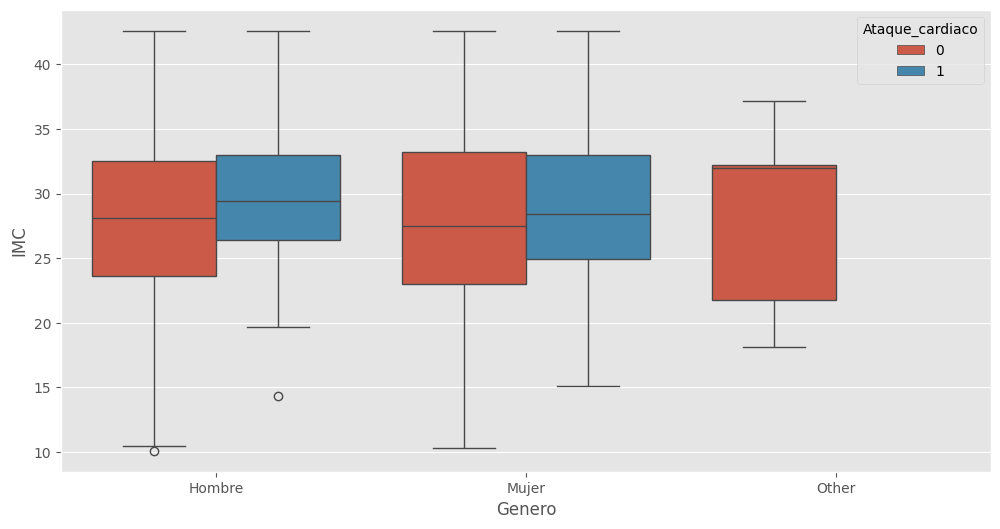

In [26]:
# Diagrama de Cajas para validar si existen outliers
plt.figure(figsize=(12,6))
sns.boxplot(x="Genero",y="IMC", hue="Ataque_cardiaco", data=infartos)

# Grafico con tratamiento de Outliers para "IMC".

In [27]:
infartos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      43400 non-null  int64  
 1   Genero                  43400 non-null  object 
 2   Edad                    43400 non-null  float64
 3   Flag_hipertension       43400 non-null  int64  
 4   Flag_problem_cardiaco   43400 non-null  int64  
 5   Estados_civil           43400 non-null  object 
 6   Tipo_trabajo            43400 non-null  object 
 7   Zona_residencia         43400 non-null  object 
 8   Flag_fumador            30108 non-null  object 
 9   Ataque_cardiaco         43400 non-null  int64  
 10  Promedio_nivel_glucosa  43400 non-null  float64
 11  IMC                     41938 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [28]:
# Agrupar por los que ganaron y ver la caantidad
# Calcular la distribución de la variable target
infartos.groupby('Ataque_cardiaco').size()

Ataque_cardiaco
0    42617
1      783
dtype: int64

Class 0 Sin paro cardiaco: 42617 - 98.2 %
Class 1 Presento paro cardiaco: 783 - 1.8 %
Proporción: 54.43 : 1


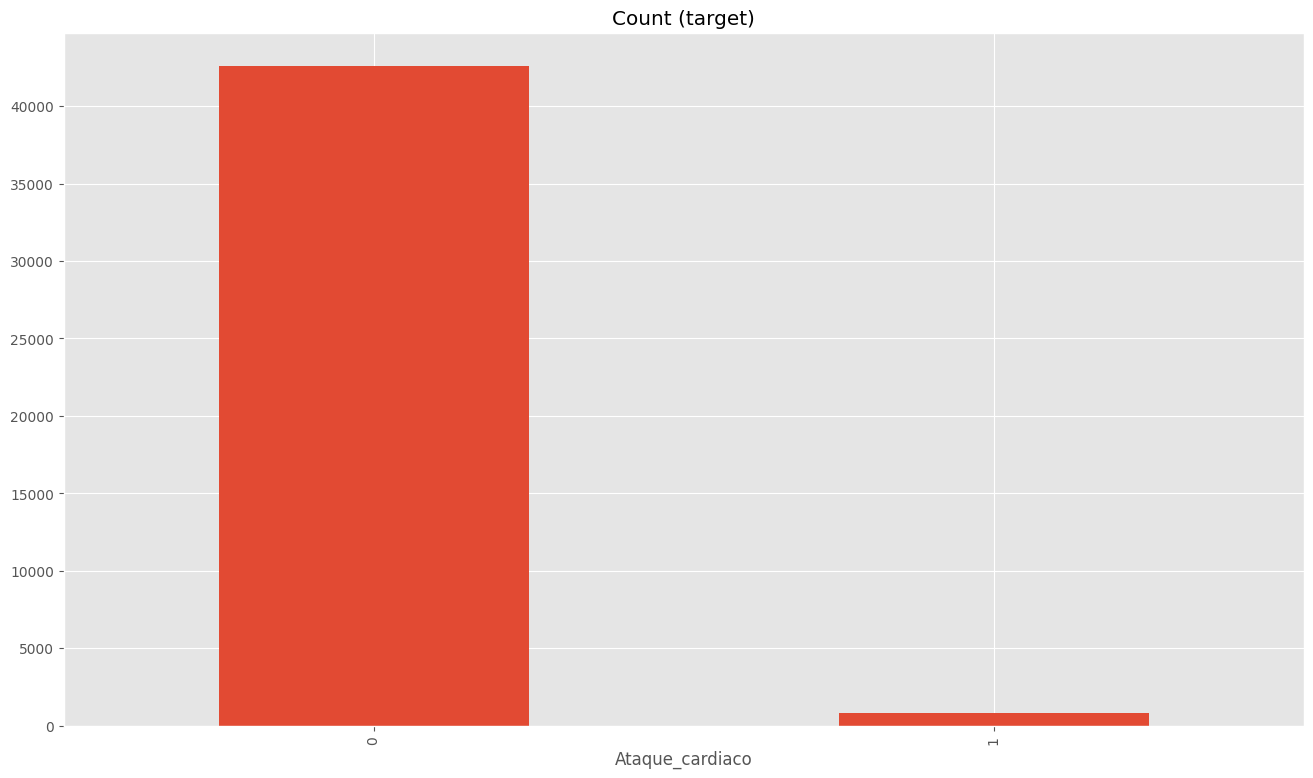

In [29]:
# Detección del desbalance de la muestras
target_count = infartos.Ataque_cardiaco.value_counts()
print('Class 0 Sin paro cardiaco:', target_count[0], '-', round((target_count[0] / len(infartos)*100), 2), '%')
print('Class 1 Presento paro cardiaco:', target_count[1], '-', round((target_count[1] / len(infartos)*100), 2), '%')
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

#Análisis: observamos que solo el 1.8% han sufrido infartos de las personas registradas

In [30]:
# Determinar si la variable es significativa
# Para que una variable sea significativa tiene que haber una disperción en los % del promedio
infartos[['Genero','Ataque_cardiaco']].groupby(['Genero'], as_index=False).agg(['count','sum','mean'])

Genero Ataque_cardiaco               
                    count  sum      mean
0  Hombre           17724  352  0.019860
1   Mujer           25665  431  0.016793
2   Other              11    0  0.000000

In [31]:
# Para que una variable sea significativa tiene que haber una disperción en los % del promedio
infartos[['Flag_hipertension','Ataque_cardiaco']].groupby(['Flag_hipertension'], as_index=False).agg(['count','sum','mean'])

Flag_hipertension Ataque_cardiaco               
                              count  sum      mean
0                 0           39339  583  0.014820
1                 1            4061  200  0.049249

In [32]:
# Para que una variable sea significativa tiene que haber una disperción en los % del promedio
infartos[['Flag_problem_cardiaco','Ataque_cardiaco']].groupby(['Flag_problem_cardiaco'], as_index=False).agg(['count','sum','mean'])

Flag_problem_cardiaco Ataque_cardiaco               
                                  count  sum      mean
0                     0           41338  606  0.014660
1                     1            2062  177  0.085839

In [33]:
# Para que una variable sea significativa tiene que haber una disperción en los % del promedio
infartos[['Estados_civil','Ataque_cardiaco']].groupby(['Estados_civil'], as_index=False).agg(['count','sum','mean'])

# tiene impacto pero no lo codideramos relevante para el estudio

Estados_civil Ataque_cardiaco               
                          count  sum      mean
0            No           15462   80  0.005174
1            Si           27938  703  0.025163

In [34]:
# Para que una variable sea significativa tiene que haber una disperción en los % del promedio
infartos[['Zona_residencia','Ataque_cardiaco']].groupby(['Zona_residencia'], as_index=False).agg(['count','sum','mean'])

# No tiene significancia para el análisis

Zona_residencia Ataque_cardiaco               
                            count  sum      mean
0           Rural           21644  384  0.017742
1          Urbano           21756  399  0.018340

In [35]:
infartos.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Flag_fumador,Ataque_cardiaco,Promedio_nivel_glucosa,IMC
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,NaN,0,95.1200,18.0
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,Nunca_fuma,0,87.9600,39.2
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,NaN,0,110.8900,17.6
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,antes_fumaba,0,69.0400,35.9
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,NaN,0,136.8115,19.1


In [36]:
print('Valores faltantes por columna:')
print(infartos.isnull().sum())

Valores faltantes por columna:
ID                            0
Genero                        0
Edad                          0
Flag_hipertension             0
Flag_problem_cardiaco         0
Estados_civil                 0
Tipo_trabajo                  0
Zona_residencia               0
Flag_fumador              13292
Ataque_cardiaco               0
Promedio_nivel_glucosa        0
IMC                        1462
dtype: int64


In [37]:
#Vamos a generar un intervalo de confianza para imputar los valores nulos del IMC
imc_avg = infartos['IMC'].mean()
imc_std = infartos['IMC'].std()
# Cuenta la cantidad de los nulos
imc_null_count = infartos['IMC'].isnull().sum()
# hacemos lista de variación / random(limt min, limit max, tamaño)
age_null_random_list = np.random.randint(imc_avg - imc_std, imc_avg + imc_std, size=imc_null_count)

conValoresNulos = np.isnan(infartos['IMC'])

infartos.loc[np.isnan(infartos['IMC']), 'IMC'] = age_null_random_list
infartos['IMC'] = infartos['IMC'].astype(int)

print("IMC Promedio: " + str(imc_avg))
print("Desvió Std IMC: " + str(imc_std))
print("Intervalo para asignar el IMC aleatoria: " + str(int(imc_avg - imc_std)) + " a " + str(int(imc_avg + imc_std)))

IMC Promedio: 28.3200701034861
Desvió Std IMC: 6.9988238122106745
Intervalo para asignar el IMC aleatoria: 21 a 35


In [38]:
def imc_fix(imc):
    if imc==0:
        return None
    return imc

infartos['IMC']=infartos.apply(lambda x: imc_fix(x['IMC']), axis=1);

In [39]:
print(infartos.isnull().sum())

ID                            0
Genero                        0
Edad                          0
Flag_hipertension             0
Flag_problem_cardiaco         0
Estados_civil                 0
Tipo_trabajo                  0
Zona_residencia               0
Flag_fumador              13292
Ataque_cardiaco               0
Promedio_nivel_glucosa        0
IMC                           0
dtype: int64


In [40]:
infartos['Flag_fumador'].value_counts().sort_index

<bound method Series.sort_index of Flag_fumador
Nunca_fuma      16053
antes_fumaba     7493
fumador          6562
Name: count, dtype: int64>

In [41]:
infartos['Flag_fumador'].unique()

array([nan, 'Nunca_fuma', 'antes_fumaba', 'fumador'], dtype=object)

In [42]:
# Procedemos a hacer el Mapping de Flag_fumador
infartos['FFumador_Encoded'] = infartos['Flag_fumador'].map({'Nunca_fuma': 1, 
                                                              'antes_fumaba': 2, 
                                                              'fumador': 3
                                                              }).fillna(0).astype(int)

In [43]:
# Encuentra la cantidad de ceros en la columna 'IMC'
Cantidad_ceros_FF = (infartos['FFumador_Encoded'] == 0).sum()

# Calcula el rango para la generación de números aleatorios
mean_FF = infartos['FFumador_Encoded'].mean()
std_FF = infartos['FFumador_Encoded'].std()

# Genera una lista aleatoria del mismo tamaño que la cantidad de ceros
lista_random_paraCeros_FF = np.random.randint(1, 2, size=Cantidad_ceros_FF)

infartos.loc[infartos['FFumador_Encoded'] == 0, 'FFumador_Encoded'] = lista_random_paraCeros_FF
infartos['FFumador_Encoded'] = infartos['FFumador_Encoded'].astype(int)

print("FF Promedio: " + str(mean_FF))
print("Desvió Std FF: " + str(std_FF))
print("Intervalo para asignar FF aleatoria: " + str(int(mean_FF - std_FF)) + " a " + str(int(mean_FF + std_FF)))

# Excluimos el 0 de la ramdom list ya que representan los valores que
# eran nulos

FF Promedio: 1.168778801843318
Desvió Std FF: 1.0272525044656768
Intervalo para asignar FF aleatoria: 0 a 2


In [44]:
def FF_fix(fum):
    if fum == 0:
        return True
    return fum

infartos['FFumador_Encoded']=infartos.apply(lambda x: FF_fix(x['FFumador_Encoded']), axis=1);

In [45]:
#median_infartos = infartos['FFumador_Encoded'].median(skipna=True)
#print(median_infartos)
#infartos = infartos.replace(0, median_infartos)
#sns.countplot(data= infartos, x='FFumador_Encoded')


In [46]:
infartos['FFumador_Encoded'].unique()

array([1, 2, 3], dtype=int64)

In [47]:
#'Nunca_fuma': 1, 
#'antes_fumaba': 2, 
#'fumador': 3
infartos['FFumador_Encoded'].value_counts().sort_index

<bound method Series.sort_index of FFumador_Encoded
1    29345
2     7493
3     6562
Name: count, dtype: int64>

<Axes: xlabel='FFumador_Encoded', ylabel='count'>

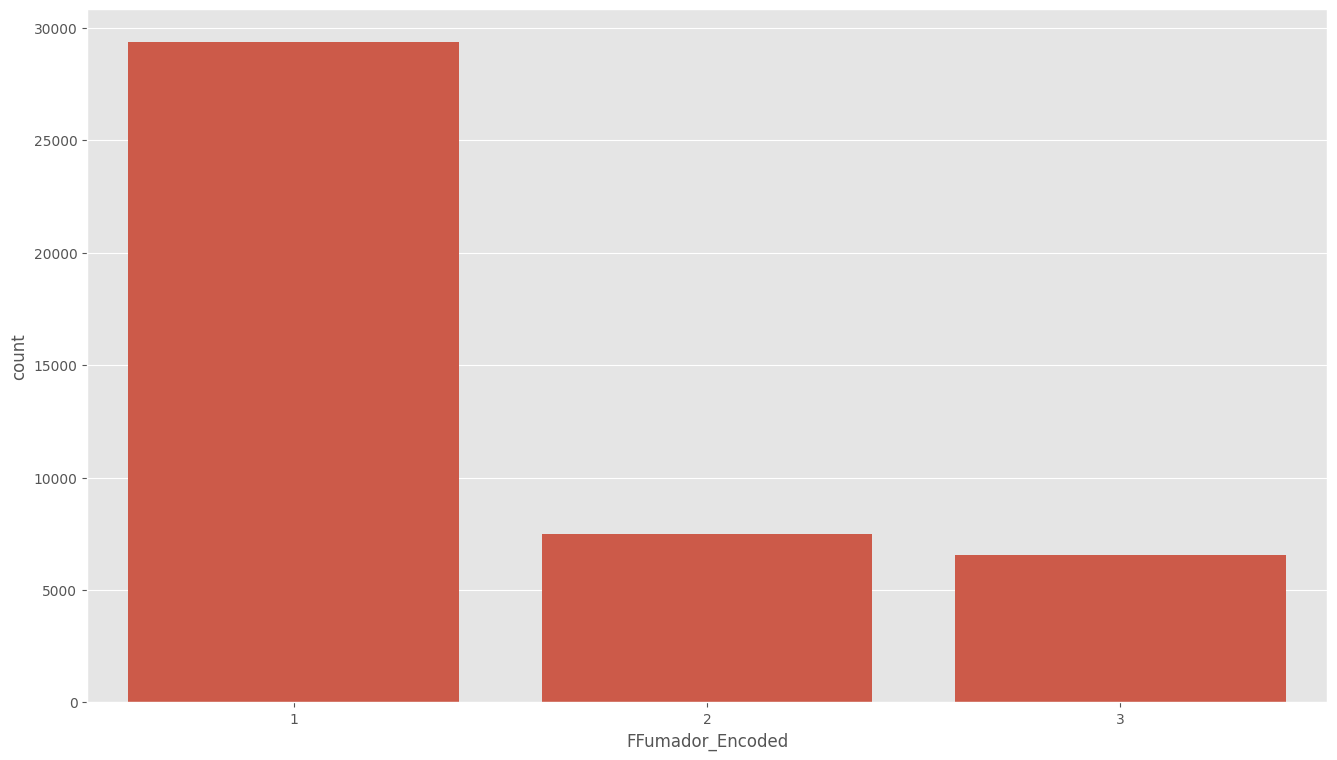

In [48]:
sns.countplot(data= infartos, x='FFumador_Encoded')

In [49]:
infartos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      43400 non-null  int64  
 1   Genero                  43400 non-null  object 
 2   Edad                    43400 non-null  float64
 3   Flag_hipertension       43400 non-null  int64  
 4   Flag_problem_cardiaco   43400 non-null  int64  
 5   Estados_civil           43400 non-null  object 
 6   Tipo_trabajo            43400 non-null  object 
 7   Zona_residencia         43400 non-null  object 
 8   Flag_fumador            30108 non-null  object 
 9   Ataque_cardiaco         43400 non-null  int64  
 10  Promedio_nivel_glucosa  43400 non-null  float64
 11  IMC                     43400 non-null  int64  
 12  FFumador_Encoded        43400 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 4.3+ MB


In [50]:
infartos['Genero'].unique()

array(['Hombre', 'Mujer', 'Other'], dtype=object)

In [51]:
# Procedemos a hacer el Mapping de Flag_fumador
infartos['Genero_Encoded'] = infartos['Genero'].map( {'Other': 0, 
                                                        'Hombre': 1, 
                                                        'Mujer': 2} ).astype(int)

In [52]:
# Mapping Edad
# Infancia: 0 a 11 años
# Adolecencia: 12 a 18 años
# Adultez Temprana: 19 a 27 años
# Adultez: 28 a 59 años
# Vejez: 60 en adelante

infartos.loc[ infartos['Edad'] <= 11, 'Edad'] = 0
infartos.loc[(infartos['Edad'] > 11) & (infartos['Edad'] <= 18), 'Edad'] = 1
infartos.loc[(infartos['Edad'] > 18) & (infartos['Edad'] <= 27), 'Edad'] = 2
infartos.loc[(infartos['Edad'] > 27) & (infartos['Edad'] <= 59), 'Edad'] = 3
infartos.loc[ infartos['Edad'] > 60, 'Edad'] = 4

In [53]:
# Mapping IMC
# IMC es menos de 18.5, se encuentra dentro del rango de peso insuficiente.
# IMC es entre 18.5 y 24.9, se encuentra dentro del rango de peso normal o saludable.
# IMC es entre 25.0 y 29.9, se encuentra dentro del rango de sobrepeso
# IMC es 30.0 o superior, se encuentra dentro del rango de obesidad.

infartos.loc[ infartos['IMC'] <= 18, 'IMC'] = 0
infartos.loc[(infartos['IMC'] > 18) & (infartos['IMC'] <= 25), 'IMC'] = 1
infartos.loc[(infartos['IMC'] > 25) & (infartos['IMC'] <= 30), 'IMC'] = 2
infartos.loc[ infartos['IMC'] > 30, 'IMC'] = 3

In [54]:
# Mapping Glucosa
# Menos de 100 mg/dL (5,6 mmol/L) se considera normal.
#Entre 100 y 125 mg/dL (5,6 a 6,9 mmol/L) se diagnostica como prediabetes.
#126 mg/dL (7,0 mmol/L) o más en dos pruebas distintas se diagnostica como diabetes.

infartos.loc[ infartos['Promedio_nivel_glucosa'] <= 100, 'Promedio_nivel_glucosa'] = 0
infartos.loc[(infartos['Promedio_nivel_glucosa'] > 100) & (infartos['Promedio_nivel_glucosa'] <= 125), 'Promedio_nivel_glucosa'] = 1
infartos.loc[ infartos['Promedio_nivel_glucosa'] > 125, 'Promedio_nivel_glucosa'] = 2

In [55]:
# Procedemos a hacer el Mapping de Zona_residencia
infartos['ZonaR_Encoded'] = infartos['Zona_residencia'].map( {'Urbano': 0, 
                                                        'Rural': 1 
                                                        } ).astype(int)

In [56]:
# Procedemos a hacer el Mapping de Zona_residencia
infartos['EstadoC_Encoded'] = infartos['Estados_civil'].map( {'No': 0, 
                                                        'Si': 1 
                                                        } ).astype(int)

In [57]:
infartos.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Flag_fumador,Ataque_cardiaco,Promedio_nivel_glucosa,IMC,FFumador_Encoded,Genero_Encoded,ZonaR_Encoded,EstadoC_Encoded
0,30669,Hombre,0.0,0,0,No,cuidar_ninos,Rural,NaN,0,0.0,0,1,1,1,0
1,30468,Hombre,3.0,1,0,Si,Empresa_privada,Urbano,Nunca_fuma,0,0.0,3,1,1,0,1
2,16523,Mujer,0.0,0,0,No,Empresa_privada,Urbano,NaN,0,1.0,0,1,2,0,0
3,56543,Mujer,4.0,0,0,Si,Empresa_privada,Rural,antes_fumaba,0,0.0,3,2,2,1,1
4,46136,Hombre,1.0,0,0,No,Nunca_trabajo,Rural,NaN,0,2.0,1,1,1,1,0


In [58]:
infartos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      43400 non-null  int64  
 1   Genero                  43400 non-null  object 
 2   Edad                    43400 non-null  float64
 3   Flag_hipertension       43400 non-null  int64  
 4   Flag_problem_cardiaco   43400 non-null  int64  
 5   Estados_civil           43400 non-null  object 
 6   Tipo_trabajo            43400 non-null  object 
 7   Zona_residencia         43400 non-null  object 
 8   Flag_fumador            30108 non-null  object 
 9   Ataque_cardiaco         43400 non-null  int64  
 10  Promedio_nivel_glucosa  43400 non-null  float64
 11  IMC                     43400 non-null  int64  
 12  FFumador_Encoded        43400 non-null  int64  
 13  Genero_Encoded          43400 non-null  int32  
 14  ZonaR_Encoded           43400 non-null

Seleccionamos las variables con las que vamos a trabajar 

In [59]:
infartos_data = infartos
drop_elements = ['ID','Genero','Estados_civil', 'Tipo_trabajo', 'Zona_residencia', 'Flag_fumador']
infartos_encoded = infartos_data.drop(drop_elements, axis = 1)

In [60]:
infartos_encoded.head()

,Edad,Flag_hipertension,Flag_problem_cardiaco,Ataque_cardiaco,Promedio_nivel_glucosa,IMC,FFumador_Encoded,Genero_Encoded,ZonaR_Encoded,EstadoC_Encoded
0,0.0,0,0,0,0.0,0,1,1,1,0
1,3.0,1,0,0,0.0,3,1,1,0,1
2,0.0,0,0,0,1.0,0,1,2,0,0
3,4.0,0,0,0,0.0,3,2,2,1,1
4,1.0,0,0,0,2.0,1,1,1,1,0


In [61]:
# Organizamos el orden de las columnas
infartos_encoded = infartos_encoded.reindex(columns = ['Ataque_cardiaco', 'Edad', 'Genero_Encoded', 'IMC', 'FFumador_Encoded', 'Promedio_nivel_glucosa', 'Flag_hipertension', 'Flag_problem_cardiaco', 'ZonaR_Encoded', 'EstadoC_Encoded'])

In [62]:
infartos_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ataque_cardiaco         43400 non-null  int64  
 1   Edad                    43400 non-null  float64
 2   Genero_Encoded          43400 non-null  int32  
 3   IMC                     43400 non-null  int64  
 4   FFumador_Encoded        43400 non-null  int64  
 5   Promedio_nivel_glucosa  43400 non-null  float64
 6   Flag_hipertension       43400 non-null  int64  
 7   Flag_problem_cardiaco   43400 non-null  int64  
 8   ZonaR_Encoded           43400 non-null  int32  
 9   EstadoC_Encoded         43400 non-null  int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 2.8 MB


<Axes: title={'center': 'Pearson Correlation of Features'}>

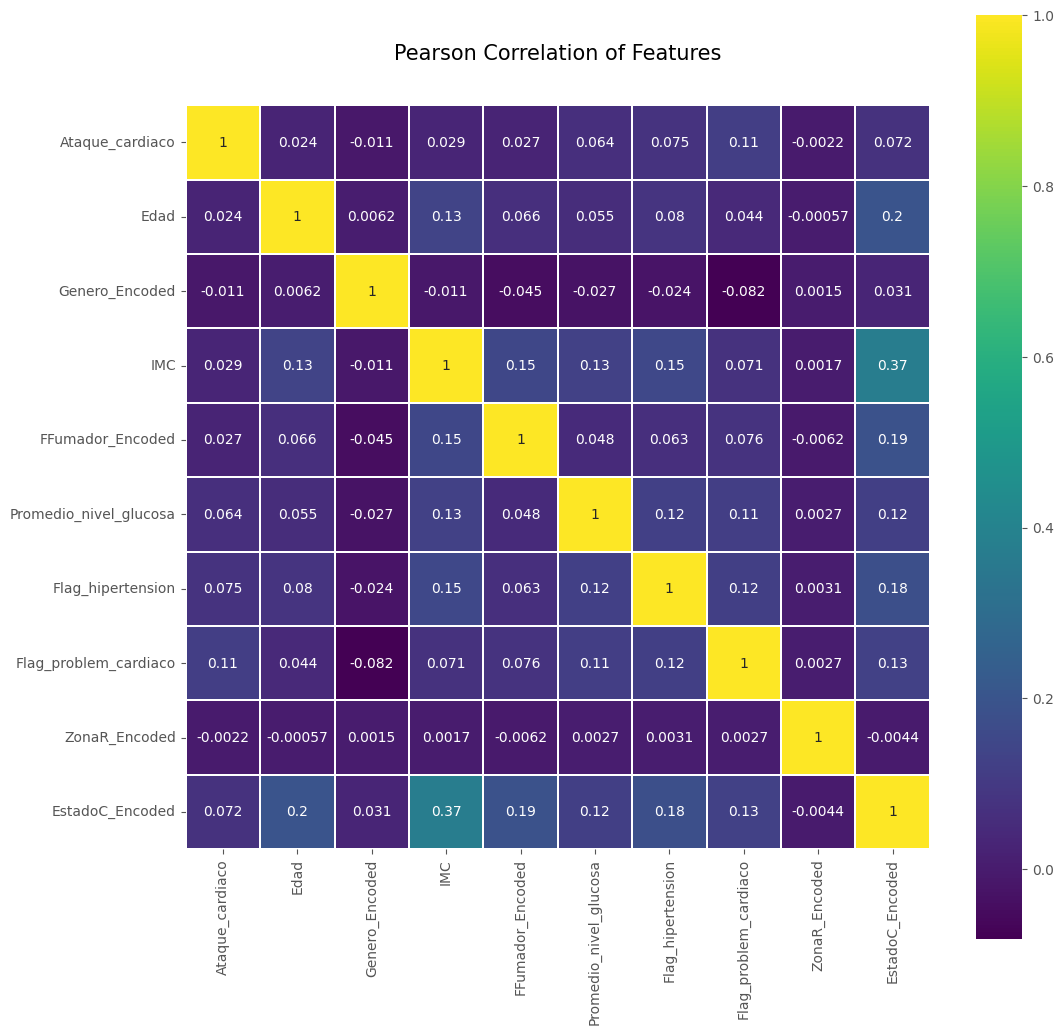

In [63]:
# Correlación de Pearson
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(infartos_encoded.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [64]:
# Saca los k=# más relevantes
X=infartos_encoded.drop(['Ataque_cardiaco'], axis=1)
y=infartos_encoded['Ataque_cardiaco']

best=SelectKBest(k=7)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Edad', 'IMC', 'FFumador_Encoded', 'Promedio_nivel_glucosa',
       'Flag_hipertension', 'Flag_problem_cardiaco', 'EstadoC_Encoded'],
      dtype='object')


### 5. Balanceo de datos

In [65]:
# Obtenemos nuestra lista final
drop_elements = ['Genero_Encoded','ZonaR_Encoded']
infartos_encoded_Final = infartos_encoded.drop(drop_elements, axis = 1)

Class 0 No presento paro cardiaco: 42617 - 98.2 %
Class 1 Presento paro cardiaco: 783 - 1.8 %
Proporción: 54.43 : 1


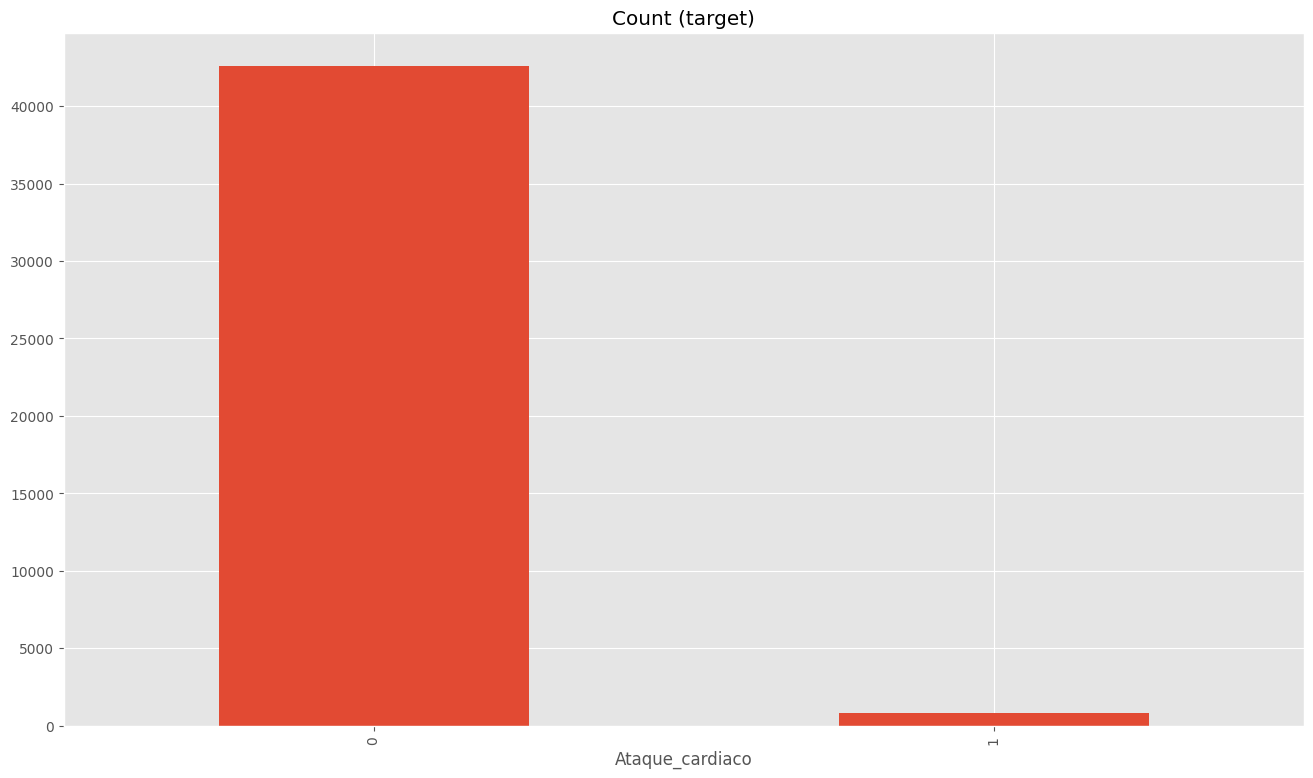

In [66]:
# Detección del desbalance de la muestras
target_count = infartos.Ataque_cardiaco.value_counts()
print('Class 0 No presento paro cardiaco:', target_count[0], '-', round((target_count[0] / len(infartos)*100), 2), '%')
print('Class 1 Presento paro cardiaco:', target_count[1], '-', round((target_count[1] / len(infartos)*100), 2), '%')
print('Proporción:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

#Análisis: observamos que solo el 1.8% han sufrido infartos de las personas registradas

In [67]:
infartos_encoded_Final.columns

Index(['Ataque_cardiaco', 'Edad', 'IMC', 'FFumador_Encoded',
       'Promedio_nivel_glucosa', 'Flag_hipertension', 'Flag_problem_cardiaco',
       'EstadoC_Encoded'],
      dtype='object')

Creamos Train y Test

In [68]:
# Seleccionaremos un 35% de los datos para estrudiar el beneficio de las estretgias de muestreo

X = infartos_encoded_Final[['Edad', 'IMC', 'FFumador_Encoded', 'Promedio_nivel_glucosa','Flag_hipertension', 'Flag_problem_cardiaco', 'EstadoC_Encoded']]
y = infartos_encoded_Final[['Ataque_cardiaco']]

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=1206)

Estrategias de muestreo

In [69]:
df_train = pd.concat([X_train,y_train],axis=1)

In [70]:
df_train.head(3)

,Edad,IMC,FFumador_Encoded,Promedio_nivel_glucosa,Flag_hipertension,Flag_problem_cardiaco,EstadoC_Encoded,Ataque_cardiaco
26476,2.0,2,1,1.0,0,0,0,0
32494,0.0,0,1,2.0,0,0,0,0
16655,3.0,2,1,0.0,0,0,1,0


In [71]:
#División entre máquinas con intensidad de pico
count_class_0, count_class_1 = df_train.Ataque_cardiaco.value_counts()

# Divide by class
df_class_0 = df_train[df_train['Ataque_cardiaco'] == 0]
df_class_1 = df_train[df_train['Ataque_cardiaco'] == 1]

In [72]:
count_class_0, count_class_1
#len(df_class_0), len(df_class_1)

(29816, 563)

UnderSampling

Estrategia de Muestreo under-sampling:
Ataque_cardiaco
0    563
1    563
Name: count, dtype: int64


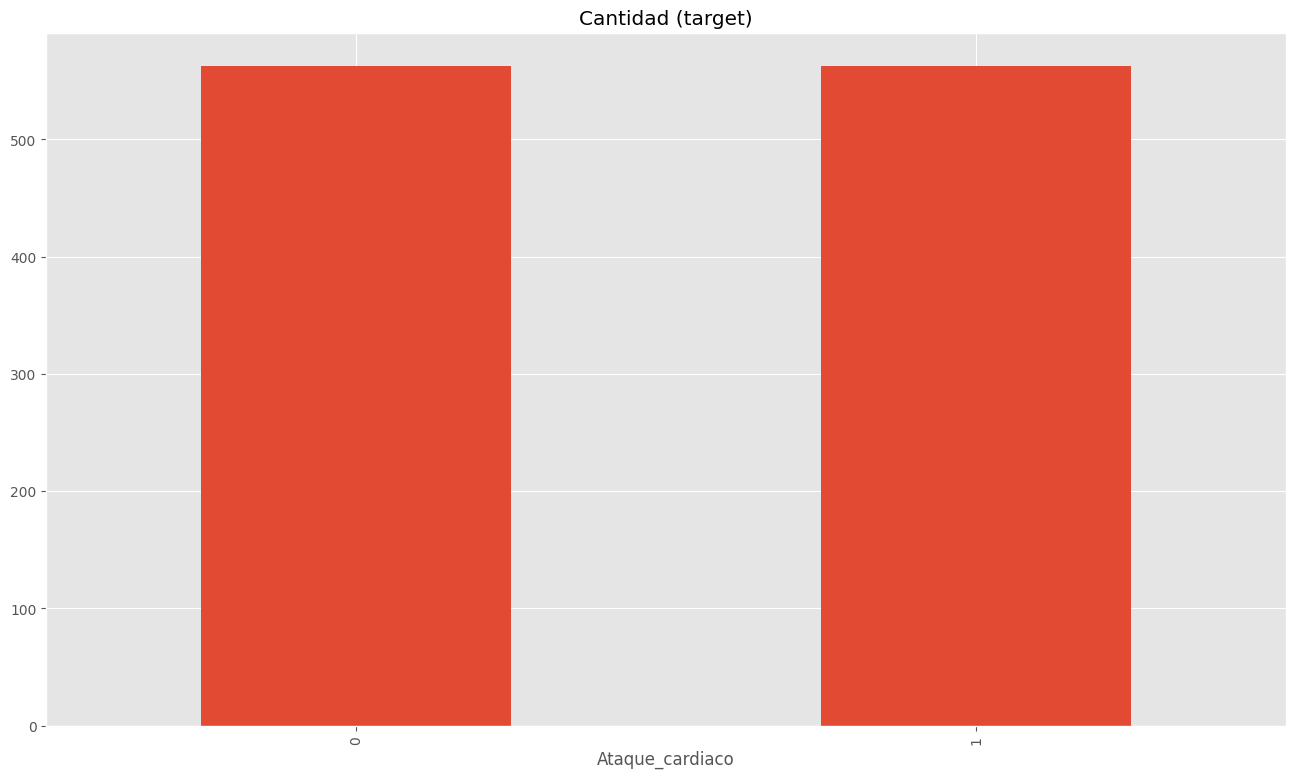

In [73]:
df_class_0_under = df_class_0.sample(count_class_1,random_state=1206)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Estrategia de Muestreo under-sampling:')
print(df_train_under.Ataque_cardiaco.value_counts())

df_train_under.Ataque_cardiaco.value_counts().plot(kind='bar', title='Cantidad (target)');

OverSampling

Random over-sampling:
Ataque_cardiaco
0    29816
1    29816
Name: count, dtype: int64


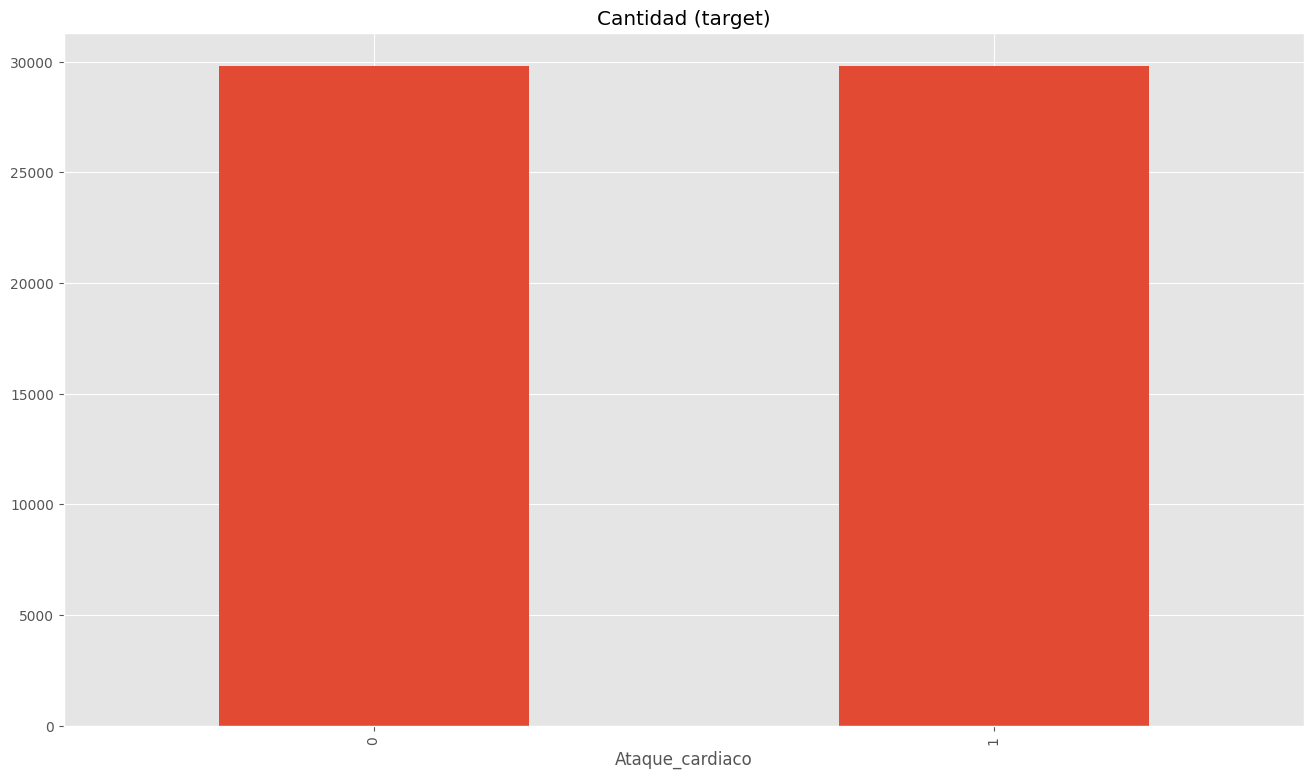

In [74]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.Ataque_cardiaco.value_counts())

df_train_over.Ataque_cardiaco.value_counts().plot(kind='bar', title='Cantidad (target)');

Obtenemos 3 DataFrames

In [75]:
df_train.Ataque_cardiaco.value_counts()

Ataque_cardiaco
0    29816
1      563
Name: count, dtype: int64

In [76]:
df_train_under.Ataque_cardiaco.value_counts()

Ataque_cardiaco
0    563
1    563
Name: count, dtype: int64

In [77]:
df_train_over.Ataque_cardiaco.value_counts()

Ataque_cardiaco
0    29816
1    29816
Name: count, dtype: int64

Evaluación de resultados de las estrategias de muestreo

a. Datos Originales

In [78]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 98.29%
Log Loss: 0.6173375350056166


Matriz de Confusión - DATOS ORIGINALES:
 [[12796     4]
 [  219     1]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12800
           1       0.20      0.00      0.01       220

    accuracy                           0.98     13020
   macro avg       0.59      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



C:\Users\jacob\AppData\Local\Temp\ipykernel_3160\843621856.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\jacob\AppData\Local\Temp\ipykernel_3160\843621856.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


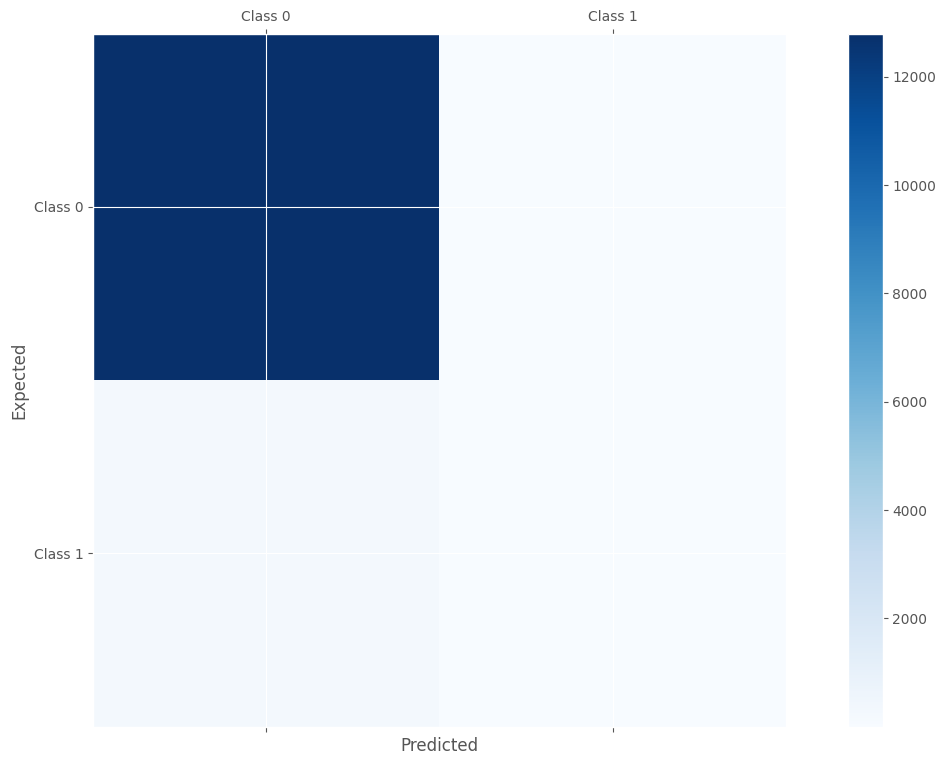

In [79]:
# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------
# CON TRAIN ORIGINAL
print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

b. Under Samplig

In [80]:
model = DecisionTreeClassifier()

X_train_u= df_train_under[['Edad', 'IMC', 'FFumador_Encoded', 'Promedio_nivel_glucosa','Flag_hipertension', 'Flag_problem_cardiaco', 'EstadoC_Encoded']]
y_train_u = df_train_under[['Ataque_cardiaco']]

model.fit(X_train_u, y_train_u)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy UNDERSAMPLING: 72.29%
Log Loss: 9.988133750225398


Matriz de Confusión UNDERSAMPLING:
 [[9257 3543]
 [  65  155]]
Métricas de Matriz de Confusión - UNDERSAMPLING:
               precision    recall  f1-score   support

           0       0.99      0.72      0.84     12800
           1       0.04      0.70      0.08       220

    accuracy                           0.72     13020
   macro avg       0.52      0.71      0.46     13020
weighted avg       0.98      0.72      0.82     13020



C:\Users\jacob\AppData\Local\Temp\ipykernel_3160\1045472563.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\jacob\AppData\Local\Temp\ipykernel_3160\1045472563.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


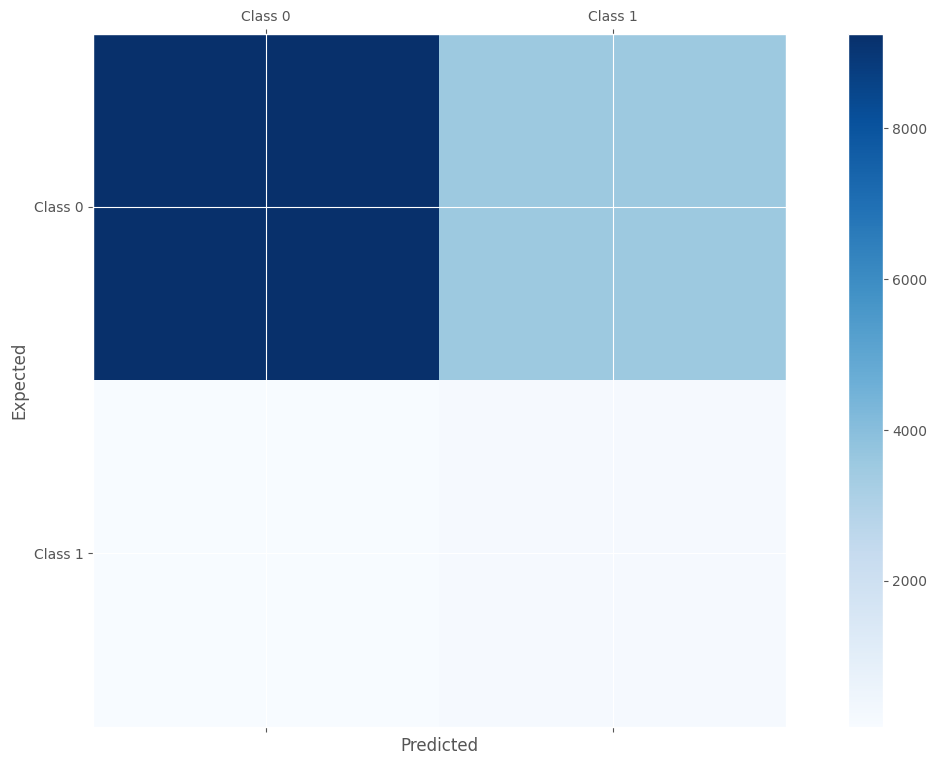

In [81]:
# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión UNDERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - UNDERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

c. Over Sampling

In [82]:
model = DecisionTreeClassifier()

X_train_o= df_train_over[['Edad', 'IMC', 'FFumador_Encoded', 'Promedio_nivel_glucosa','Flag_hipertension', 'Flag_problem_cardiaco', 'EstadoC_Encoded']]
y_train_o = df_train_over[['Ataque_cardiaco']]

model.fit(X_train_o, y_train_o)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING: 73.21%
Log Loss: 9.655934179818788


Matriz de Confusión OVERSAMPLING:
 [[9377 3423]
 [  65  155]]
Métricas de Matriz de Confusión - OVERSAMPLING:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84     12800
           1       0.04      0.70      0.08       220

    accuracy                           0.73     13020
   macro avg       0.52      0.72      0.46     13020
weighted avg       0.98      0.73      0.83     13020



C:\Users\jacob\AppData\Local\Temp\ipykernel_3160\3708370258.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\jacob\AppData\Local\Temp\ipykernel_3160\3708370258.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


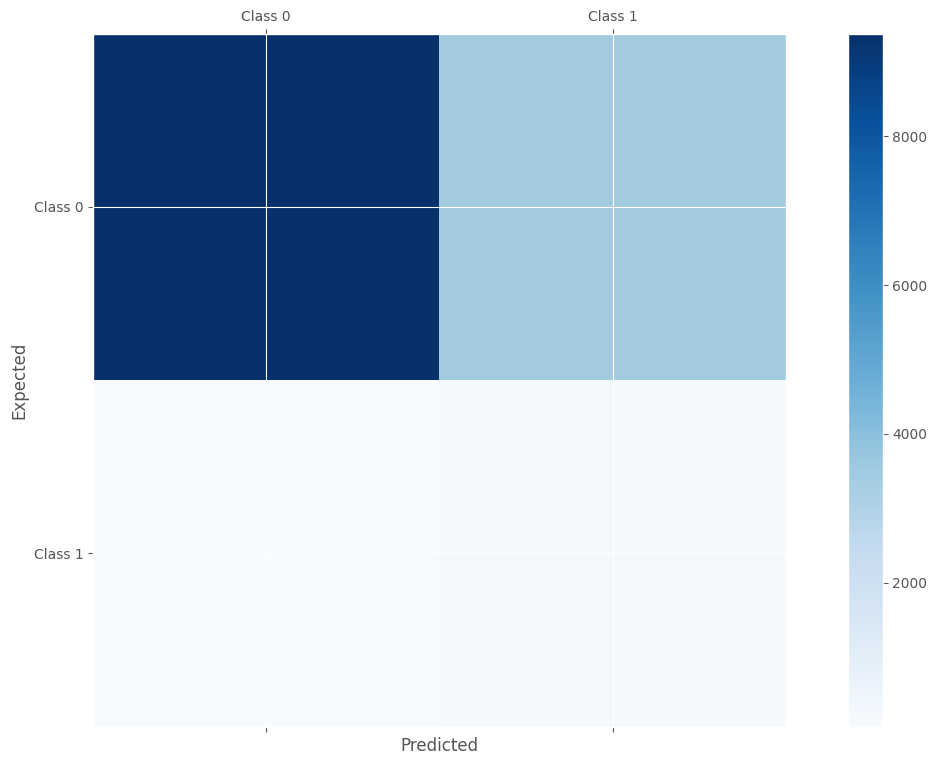

In [83]:
# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión OVERSAMPLING:\n', conf_mat)

print('Métricas de Matriz de Confusión - OVERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### 6. Modelado

In [84]:
infartos_encoded_Final.head()

,Ataque_cardiaco,Edad,IMC,FFumador_Encoded,Promedio_nivel_glucosa,Flag_hipertension,Flag_problem_cardiaco,EstadoC_Encoded
0,0,0.0,0,1,0.0,0,0,0
1,0,3.0,3,1,0.0,1,0,1
2,0,0.0,0,1,1.0,0,0,0
3,0,4.0,3,2,0.0,0,0,1
4,0,1.0,1,1,2.0,0,0,0


Declaramos los modelos

In [85]:
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=20 , max_depth=8, learning_rate=0.1 , subsample=0.5)
model3 = CatBoostClassifier()
model4 = RandomForestClassifier()
model5 = RandomForestClassifier(n_estimators=20, max_depth=8)
model6 = DecisionTreeClassifier()

Aplicamos los modelos a el DF Train de OverSampling

In [86]:
model1.fit(X_train_o, y_train_o)

c:\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:38

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
model2.fit(X_train_o, y_train_o)

c:\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:38

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
model3.fit(X_train_o, y_train_o)

Learning rate set to 0.059029
0:	learn: 0.6585799	total: 173ms	remaining: 2m 52s
1:	learn: 0.6304690	total: 194ms	remaining: 1m 36s
2:	learn: 0.6073506	total: 215ms	remaining: 1m 11s
3:	learn: 0.5919310	total: 237ms	remaining: 59s
4:	learn: 0.5795666	total: 260ms	remaining: 51.7s
5:	learn: 0.5653588	total: 283ms	remaining: 46.9s
6:	learn: 0.5548036	total: 307ms	remaining: 43.5s
7:	learn: 0.5456201	total: 328ms	remaining: 40.7s
8:	learn: 0.5388649	total: 346ms	remaining: 38.1s
9:	learn: 0.5329577	total: 365ms	remaining: 36.1s
10:	learn: 0.5273456	total: 385ms	remaining: 34.6s
11:	learn: 0.5220226	total: 407ms	remaining: 33.5s
12:	learn: 0.5177694	total: 427ms	remaining: 32.5s
13:	learn: 0.5153237	total: 443ms	remaining: 31.2s
14:	learn: 0.5077886	total: 465ms	remaining: 30.6s
15:	learn: 0.5022738	total: 482ms	remaining: 29.7s
16:	learn: 0.4991222	total: 502ms	remaining: 29s
17:	learn: 0.4968250	total: 518ms	remaining: 28.3s
18:	learn: 0.4950223	total: 536ms	remaining: 27.7s
19:	learn: 0

66:	learn: 0.4554834	total: 1.46s	remaining: 20.4s
67:	learn: 0.4550829	total: 1.48s	remaining: 20.3s
68:	learn: 0.4549106	total: 1.5s	remaining: 20.3s
69:	learn: 0.4545833	total: 1.52s	remaining: 20.2s
70:	learn: 0.4544559	total: 1.54s	remaining: 20.1s
71:	learn: 0.4541979	total: 1.56s	remaining: 20.1s
72:	learn: 0.4539807	total: 1.58s	remaining: 20s
73:	learn: 0.4537416	total: 1.6s	remaining: 20s
74:	learn: 0.4535544	total: 1.61s	remaining: 19.9s
75:	learn: 0.4532867	total: 1.63s	remaining: 19.8s
76:	learn: 0.4532858	total: 1.65s	remaining: 19.7s
77:	learn: 0.4530915	total: 1.67s	remaining: 19.8s
78:	learn: 0.4527931	total: 1.69s	remaining: 19.7s
79:	learn: 0.4527762	total: 1.71s	remaining: 19.6s
80:	learn: 0.4526085	total: 1.72s	remaining: 19.6s
81:	learn: 0.4523314	total: 1.74s	remaining: 19.5s
82:	learn: 0.4520034	total: 1.76s	remaining: 19.4s
83:	learn: 0.4518884	total: 1.77s	remaining: 19.4s
84:	learn: 0.4517517	total: 1.79s	remaining: 19.3s
85:	learn: 0.4516696	total: 1.81s	rem

In [89]:
model4.fit(X_train_o, y_train_o)

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [90]:
model5.fit(X_train_o, y_train_o)

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=8, n_estimators=20)

In [91]:
model6.fit(X_train_o, y_train_o)

DecisionTreeClassifier()

Predecimos un resultado para casa modelo

In [92]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)

c:\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:33

Procedemos a hacer la matriz de confusión para cada modelo generado y lo comparamos con el test. Comparamos lo real frente a lo predicho

In [93]:
confusion_matrix(y_test, pred1)

array([[9387, 3413],
       [  64,  156]], dtype=int64)

In [94]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     12800
           1       0.04      0.71      0.08       220

    accuracy                           0.73     13020
   macro avg       0.52      0.72      0.46     13020
weighted avg       0.98      0.73      0.83     13020



In [95]:
confusion_matrix(y_test, pred2)

array([[9455, 3345],
       [  57,  163]], dtype=int64)

In [96]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     12800
           1       0.05      0.74      0.09       220

    accuracy                           0.74     13020
   macro avg       0.52      0.74      0.47     13020
weighted avg       0.98      0.74      0.83     13020



In [97]:
confusion_matrix(y_test, pred3)

array([[9401, 3399],
       [  65,  155]], dtype=int64)

In [98]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     12800
           1       0.04      0.70      0.08       220

    accuracy                           0.73     13020
   macro avg       0.52      0.72      0.46     13020
weighted avg       0.98      0.73      0.83     13020



In [99]:
confusion_matrix(y_test, pred4)

array([[9340, 3460],
       [  65,  155]], dtype=int64)

In [100]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     12800
           1       0.04      0.70      0.08       220

    accuracy                           0.73     13020
   macro avg       0.52      0.72      0.46     13020
weighted avg       0.98      0.73      0.83     13020



In [101]:
confusion_matrix(y_test, pred5)

array([[9508, 3292],
       [  55,  165]], dtype=int64)

In [102]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     12800
           1       0.05      0.75      0.09       220

    accuracy                           0.74     13020
   macro avg       0.52      0.75      0.47     13020
weighted avg       0.98      0.74      0.84     13020



In [103]:
confusion_matrix(y_test, pred6)

array([[9378, 3422],
       [  65,  155]], dtype=int64)

In [104]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     12800
           1       0.04      0.70      0.08       220

    accuracy                           0.73     13020
   macro avg       0.52      0.72      0.46     13020
weighted avg       0.98      0.73      0.83     13020



In [105]:
df_Algth = pd.DataFrame({'algorithm' : ['XGBoost','XGBoost Tuneado','Catboost','RF','RF Tuneado','Arbol de Decision'],
                    'accuracy' : [0.72, 0.74, 0.73, 0.73, 0.75, 0.73],
                   'precision' : [0.04, 0.05, 0.40, 0.40, 0.05, 0.04],
                   'recall' : [0.72, 0.72, 0.72, 0.71, 0.73, 0.71]})

In [106]:
df_Algth

,algorithm,accuracy,precision,recall
0,XGBoost,0.72,0.04,0.72
1,XGBoost Tuneado,0.74,0.05,0.72
2,Catboost,0.73,0.40,0.72
3,RF,0.73,0.40,0.71
4,RF Tuneado,0.75,0.05,0.73
5,Arbol de Decision,0.73,0.04,0.71


#### El modelo RF Tuneado tiene la mejor precisión y recall
Tiene la mejor predicción

Matriz de Confusión MODELO GANADOR: RF Tuneado
 [[9508 3292]
 [  55  165]]
Métricas de Matriz de Confusión - MODELO GANADOR:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84     12800
           1       0.04      0.70      0.08       220

    accuracy                           0.73     13020
   macro avg       0.52      0.72      0.46     13020
weighted avg       0.98      0.73      0.83     13020



C:\Users\jacob\AppData\Local\Temp\ipykernel_3160\839879299.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
C:\Users\jacob\AppData\Local\Temp\ipykernel_3160\839879299.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


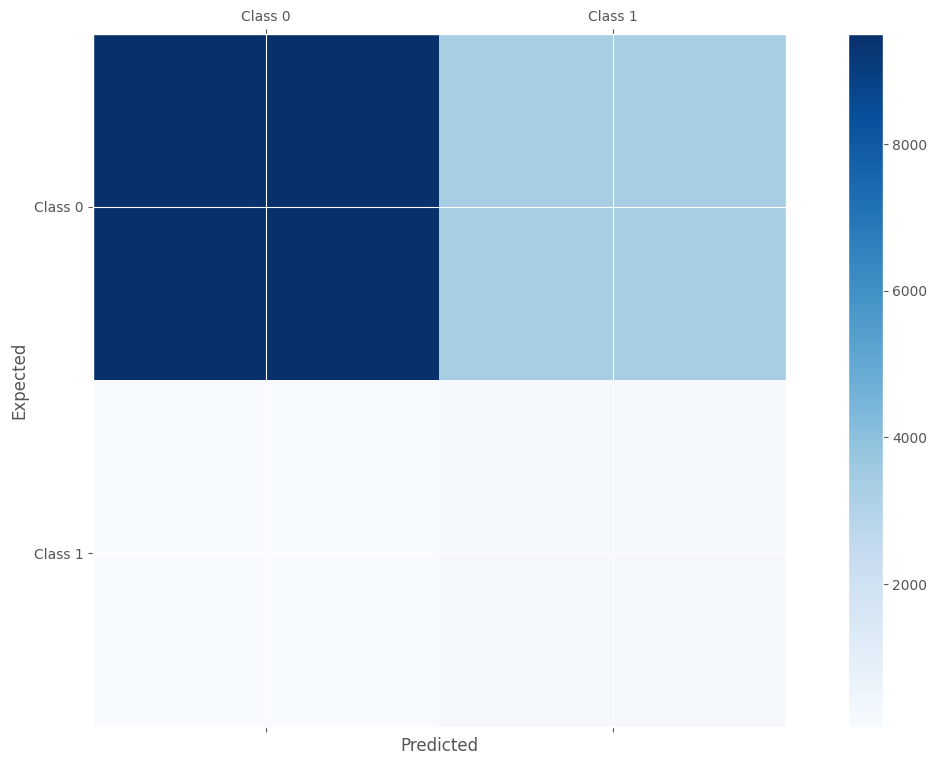

In [107]:
# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred5) ##Modificar al modelo
#--------------------------------------------------------------------

print('Matriz de Confusión MODELO GANADOR: RF Tuneado\n', conf_mat)

print('Métricas de Matriz de Confusión - MODELO GANADOR:\n',classification_report(y_test,pred4))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

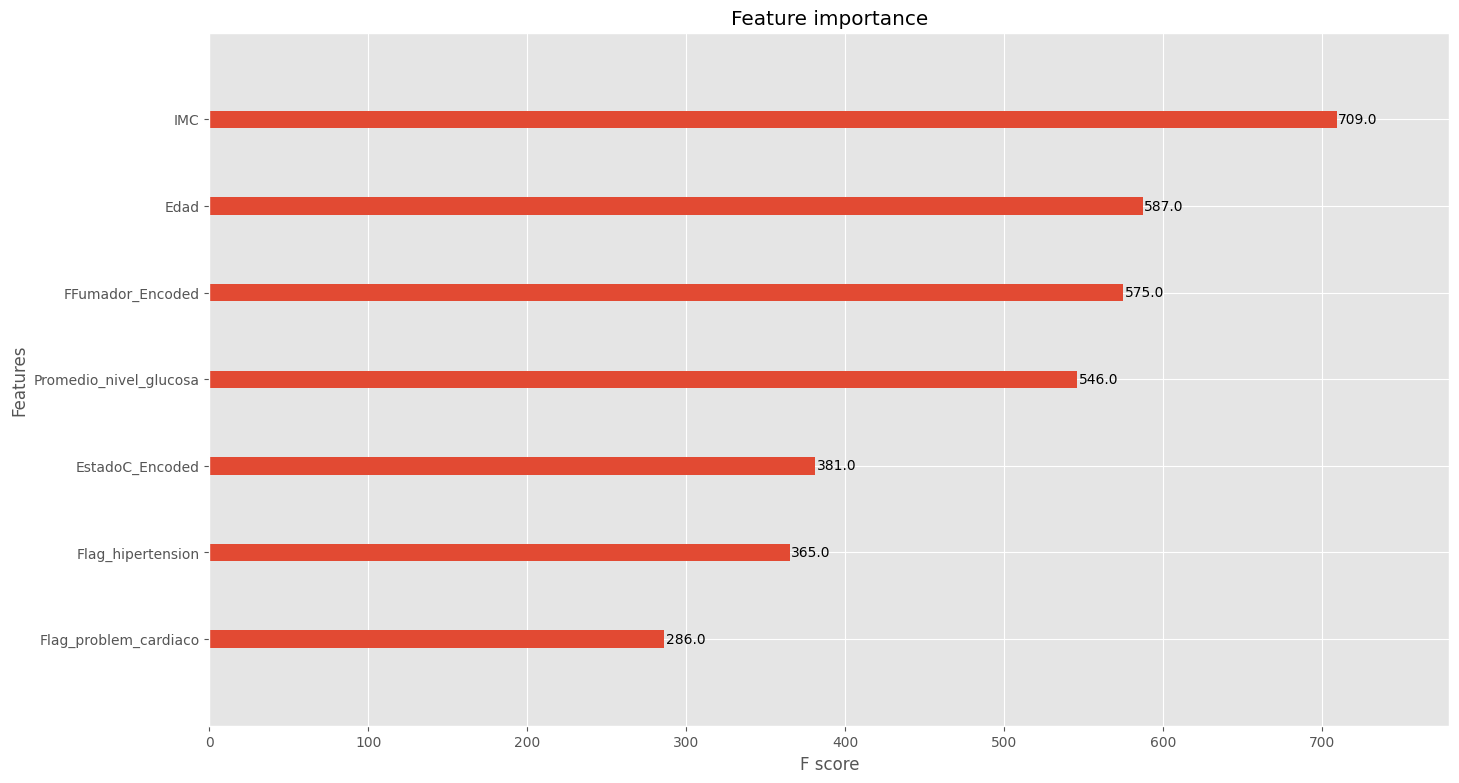

In [108]:
# Para los modelos con XGBoost se puede sacar un grafico de importancia
# LA PARTICIPACIÓN DE CADA VARIABLE
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model1)
pyplot.show()

Se puede concluir que las variables que impactan más a que sea más propenso a sufrir un ataque cardiaco son: IMC, Si fuma, El nivel de glucosa en sangre y la edad

##### Ensayamos el modelo

In [109]:
infartos_encoded_Final.head()

,Ataque_cardiaco,Edad,IMC,FFumador_Encoded,Promedio_nivel_glucosa,Flag_hipertension,Flag_problem_cardiaco,EstadoC_Encoded
0,0,0.0,0,1,0.0,0,0,0
1,0,3.0,3,1,0.0,1,0,1
2,0,0.0,0,1,1.0,0,0,0
3,0,4.0,3,2,0.0,0,0,1
4,0,1.0,1,1,2.0,0,0,0


In [120]:
persona = [2, 1, 3, 0, 0, 1, 0]
predi = model5.predict([persona])

if predi[0] == 1:
    print('Infarto')
else:
    print('No Infarto')

No Infarto


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
